## Descriptive Statistics - EDA

Exploratory data analysis (EDA) is amongst the first steps of analyzing data. It is usually done with descriptive statistics, where you'll summarize the statistical aspects of your dataset and start to unravel your insights. Further on, I highly recommend using data visualization in this step.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [31]:
pd.set_option('display.max_columns', None) # displays all columns in dfs

import warnings
warnings.filterwarnings('ignore') # no more 'useless' red warnings 

DOCS for Seaborn = https://seaborn.pydata.org/index.html

In [32]:
data = pd.read_csv('merged_clean_ver2.csv')

In [33]:
# data.dtypes
data.describe().T # include=[np.number] # 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3993 entries, 0 to 3992
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       3993 non-null   int64  
 1   state                    3993 non-null   object 
 2   gender                   3993 non-null   object 
 3   median_home_val          3993 non-null   float64
 4   median_household_income  3993 non-null   int64  
 5   ic2                      3993 non-null   int64  
 6   ic3                      3993 non-null   int64  
 7   ic4                      3993 non-null   int64  
 8   ic5                      3993 non-null   int64  
 9   avggift                  3993 non-null   float64
 10  target_d                 3993 non-null   float64
dtypes: float64(3), int64(6), object(2)
memory usage: 343.3+ KB


In [34]:
summary = data.describe().T
summary['iqr'] = summary['75%']-summary['25%']
summary = summary.apply(round) # lambda x: round(x, 2)
summary

,count,mean,std,min,25%,50%,75%,max,iqr
id,3993.0,98929.0,58180.0,12.0,46153.0,101432.0,151653.0,191779.0,105500.0
median_home_val,3993.0,1158.0,1033.0,0.0,548.0,803.0,1349.0,5982.0,801.0
median_household_income,3993.0,352.0,168.0,0.0,239.0,318.0,425.0,1500.0,186.0
ic2,3993.0,401.0,181.0,0.0,284.0,366.0,478.0,1500.0,194.0
ic3,3993.0,400.0,165.0,0.0,287.0,365.0,480.0,1311.0,193.0
ic4,3993.0,445.0,175.0,0.0,325.0,410.0,528.0,1331.0,203.0
ic5,3993.0,16456.0,9455.0,0.0,11136.0,14356.0,18780.0,174523.0,7644.0
avggift,3993.0,12.0,10.0,2.0,7.0,10.0,14.0,450.0,7.0
target_d,3993.0,16.0,13.0,1.0,10.0,14.0,20.0,200.0,10.0


#### Read a bit about [IQR: inter quartile range](https://medium.com/@vinitasilaparasetty/quartiles-for-beginners-in-data-science-2ca5a640b07b)

![iqr](https://www.cese.nsw.gov.au/effective-practices/images/Images/Using_Data_with_Confidence/interquartile_range_1.JPG)

IQR can be a good way to spot outliers (outliers are values too big or too small for your analysis).

#### ------

### Exploratory data analysis using Matplotlib

In [35]:
import matplotlib.pyplot as plt

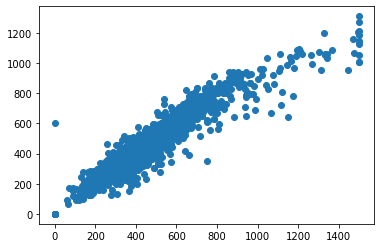

In [36]:
plt.scatter(data['ic2'], data['ic3'])
plt.show()

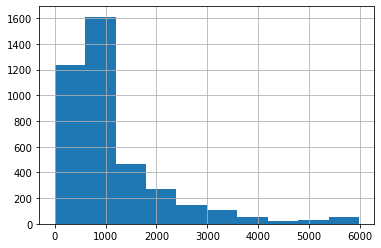

In [37]:
data['median_home_val'].hist()
plt.show()

# xsticks()
# ysticks()

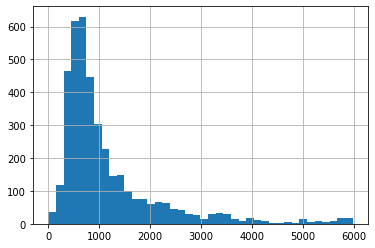

In [38]:
data['median_home_val'].hist(bins=40)
plt.show()

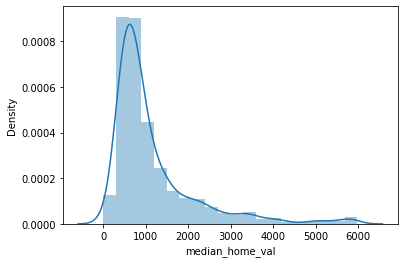

In [39]:
# seaborn lib

sns.distplot(data['median_home_val'], bins=20)
plt.show()

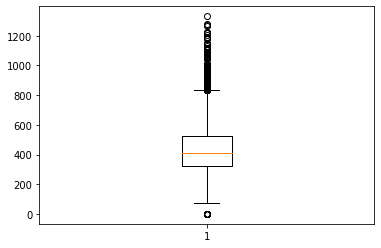

In [40]:
plt.boxplot(data['ic4'])
plt.show()

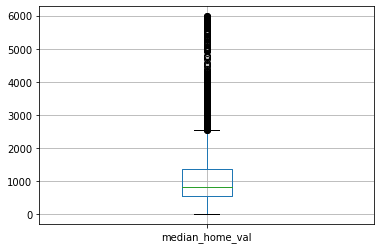

In [41]:
data[['median_home_val']].boxplot()
plt.show()

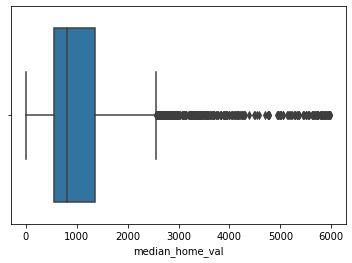

In [42]:
sns.boxplot(x="median_home_val", data=data) # same as sns.boxplot(data["median_home_val"])
plt.show()

In [43]:
data1 = data[(data['gender']=='M') | (data['gender'] == 'F')]

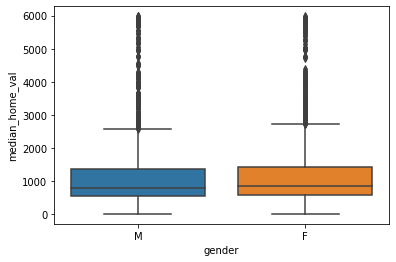

In [44]:
sns.boxplot(x='gender', y='median_home_val', data=data1)
plt.show()

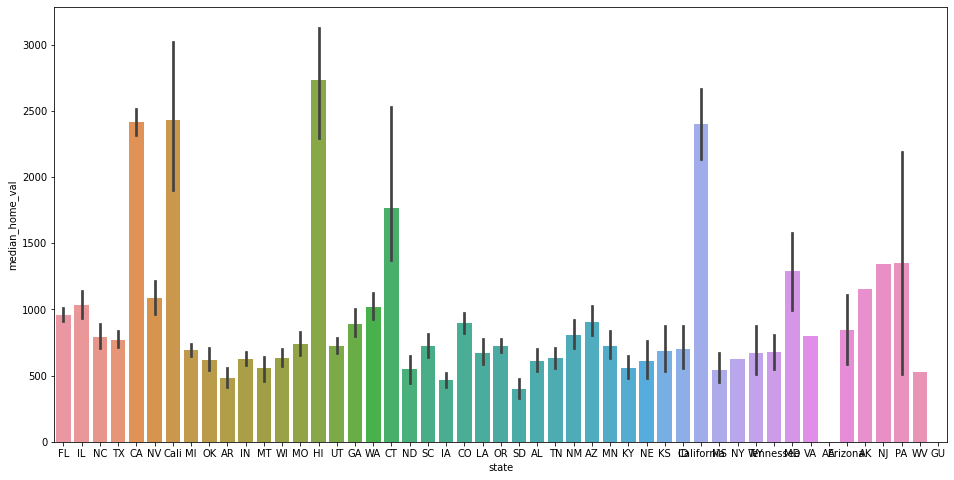

In [45]:
plt.figure(figsize=(16,8))

sns.barplot(x="state", y="median_home_val", data=data1)
plt.show()

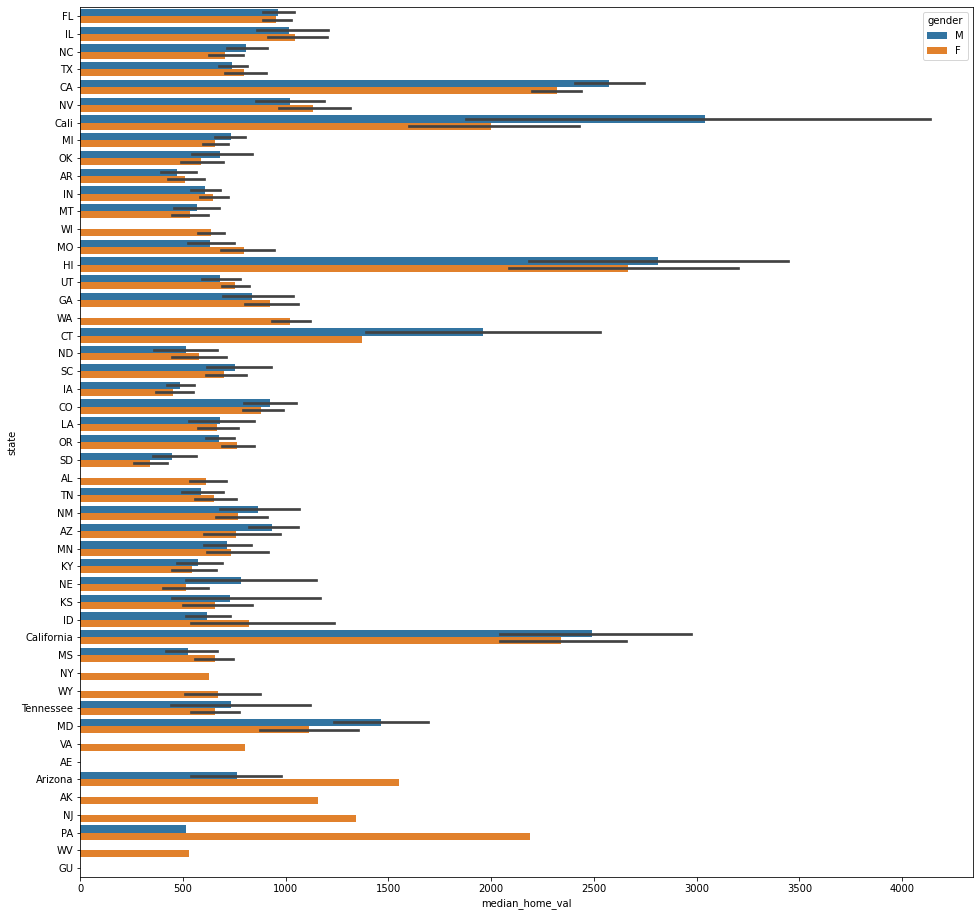

In [46]:
plt.figure(figsize=(16,16))

sns.barplot(y="state", x="median_home_val", hue='gender', data=data1)
plt.show()

<AxesSubplot:xlabel='state', ylabel='count'>

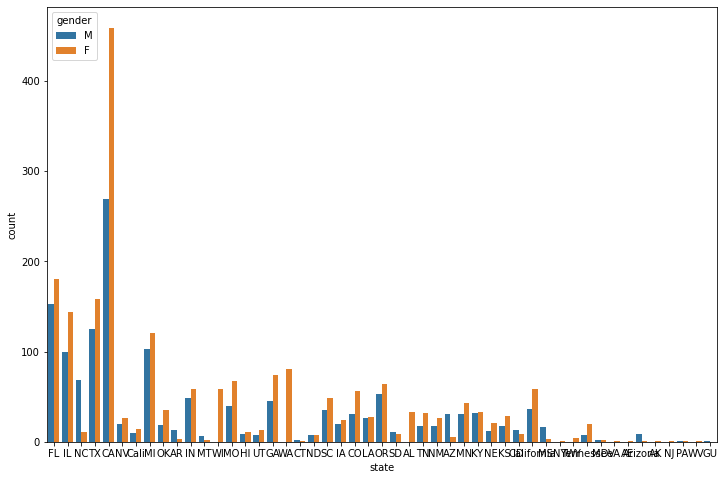

In [47]:
plt.figure(figsize=(12,8))
sns.countplot('state', hue='gender', data=data1)

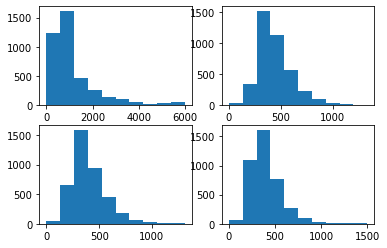

In [48]:
# multiple plots in the same space

fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(data['median_home_val'])
axs[0, 1].hist(data['ic4'])
axs[1, 0].hist(data['ic3'])
axs[1, 1].hist(data['ic2'])

plt.show()

#### ------

### Intro to Correlation and Covariance
Measures the relationship and the dependency between two variables. “Covariance” indicates the direction of the linear relationship between variables. “Correlation” measures the direction and strength of the linear relationship between two variables. They can be calculated by:
* Pearson: measure the strength of linear correlation; (continuos data)
* Spearman: measure the strength of non-linear correlation also; (continuous and discrete/ordinal data)
* Kendall: similar to Spearman, but values are closer to zero and is less sensitive to outliers.

#### A more dense read [here](https://towardsdatascience.com/under-the-hood-correlation-and-collinearity-b6674b1fb33b)

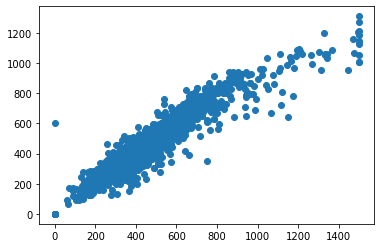

In [49]:
#covariance 共分散
#correlation 相関関係があるかどうかを見る　correlation=1の時は完全に相関がある

x = data['ic2']
y = data['ic3']

plt.scatter(x, y)
plt.show()

In [50]:
x.corr(y) # standard is 'pearson', method='spearman'

0.9535853403294131

In [52]:
data.corr()

,id,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,target_d
id,1.000000,0.249922,0.099182,0.092586,0.105039,0.098233,0.072773,-0.004794,0.028057
median_home_val,0.249922,1.000000,0.707209,0.743318,0.734526,0.748761,0.745223,0.138966,0.116805
median_household_income,0.099182,0.707209,1.000000,0.951409,0.974777,0.928980,0.805221,0.120445,0.113246
ic2,0.092586,0.743318,0.951409,1.000000,0.953585,0.971498,0.874783,0.136096,0.129964
ic3,0.105039,0.734526,0.974777,0.953585,1.000000,0.971909,0.827514,0.125438,0.121965
ic4,0.098233,0.748761,0.928980,0.971498,0.971909,1.000000,0.868411,0.132438,0.131260
ic5,0.072773,0.745223,0.805221,0.874783,0.827514,0.868411,1.000000,0.141580,0.137878
avggift,-0.004794,0.138966,0.120445,0.136096,0.125438,0.132438,0.141580,1.000000,0.487595
target_d,0.028057,0.116805,0.113246,0.129964,0.121965,0.131260,0.137878,0.487595,1.000000


In [53]:
data.corr(method='spearman')
# spearman methodでは、それぞれのカラムの順位、順番で相関関係をみる

,id,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,target_d
id,1.000000,0.254797,0.100530,0.093142,0.107530,0.098264,0.094923,0.046169,0.042353
median_home_val,0.254797,1.000000,0.728291,0.743631,0.772365,0.771694,0.760386,0.162951,0.134380
median_household_income,0.100530,0.728291,1.000000,0.943243,0.972989,0.920689,0.810895,0.140062,0.136896
ic2,0.093142,0.743631,0.943243,1.000000,0.951062,0.970592,0.872129,0.148673,0.141259
ic3,0.107530,0.772365,0.972989,0.951062,1.000000,0.967619,0.875048,0.150231,0.146423
ic4,0.098264,0.771694,0.920689,0.970592,0.967619,1.000000,0.918519,0.151864,0.145651
ic5,0.094923,0.760386,0.810895,0.872129,0.875048,0.918519,1.000000,0.146437,0.141359
avggift,0.046169,0.162951,0.140062,0.148673,0.150231,0.151864,0.146437,1.000000,0.750530
target_d,0.042353,0.134380,0.136896,0.141259,0.146423,0.145651,0.141359,0.750530,1.000000


In [55]:
# Extra: 
# kendalltau では順番づけをするけど、より正確に分析する
# 通常は、pearsonをよく使う
# yに入っている要素は、p valueという。統計学的に、相関してもいいかを
# pvalue < .05 95% statiscally corrent
# pvalue > .5 statically not corrent 

stats.pearsonr(x, y), stats.spearmanr(x, y), stats.kendalltau(x, y)

((0.9535853403294211, 0.0),
 SpearmanrResult(correlation=0.9510617375454639, pvalue=0.0),
 KendalltauResult(correlation=0.8254641303546064, pvalue=0.0))

#### For more details on pearson vs spearman correlation, [link](https://towardsdatascience.com/clearly-explained-pearson-v-s-spearman-correlation-coefficient-ada2f473b8)

#### ------

In [56]:
corr_data = data.select_dtypes([np.number])
correlations_matrix = corr_data.corr()  # method='spearman'
correlations_matrix

,id,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,target_d
id,1.000000,0.249922,0.099182,0.092586,0.105039,0.098233,0.072773,-0.004794,0.028057
median_home_val,0.249922,1.000000,0.707209,0.743318,0.734526,0.748761,0.745223,0.138966,0.116805
median_household_income,0.099182,0.707209,1.000000,0.951409,0.974777,0.928980,0.805221,0.120445,0.113246
ic2,0.092586,0.743318,0.951409,1.000000,0.953585,0.971498,0.874783,0.136096,0.129964
ic3,0.105039,0.734526,0.974777,0.953585,1.000000,0.971909,0.827514,0.125438,0.121965
ic4,0.098233,0.748761,0.928980,0.971498,0.971909,1.000000,0.868411,0.132438,0.131260
ic5,0.072773,0.745223,0.805221,0.874783,0.827514,0.868411,1.000000,0.141580,0.137878
avggift,-0.004794,0.138966,0.120445,0.136096,0.125438,0.132438,0.141580,1.000000,0.487595
target_d,0.028057,0.116805,0.113246,0.129964,0.121965,0.131260,0.137878,0.487595,1.000000


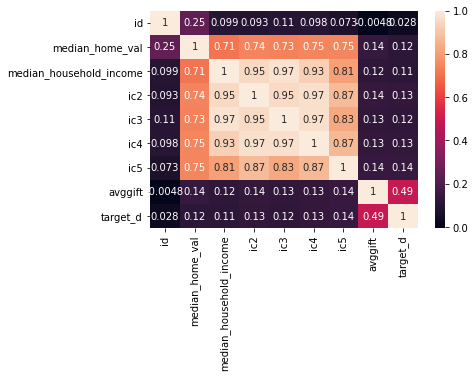

In [26]:
sns_plot = sns.heatmap(correlations_matrix, annot=True)
figure = sns_plot.get_figure()    
figure.savefig('svm_conf.png', dpi=400)
plt.show()
# plt.savefig('name_i_want.png')

In [30]:
mask = np.zeros_like(correlations_matrix)
print(np.triu_indices_from(mask))

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7,
       8]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 2, 3, 4, 5, 6,
       7, 8, 3, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 5, 6, 7, 8, 6, 7, 8, 7, 8,
       8]))


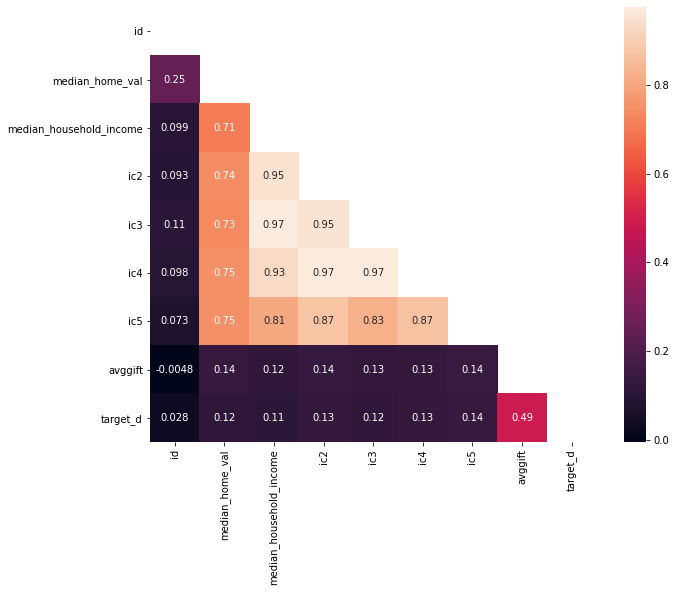

In [83]:
mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [57]:
crosstab = pd.crosstab(data['state'],data['gender'])  # note we need to clean column state before we use this crosstab

In [58]:
crosstab

gender,A,F,Female,J,M,Male,U,feamale,female,male
state,,,,,,,,,,
AA,0,0,0,0,0,2,0,0,0,0
AE,0,1,0,0,0,0,0,0,0,0
AK,0,1,0,0,0,5,0,0,0,0
AL,0,33,0,2,0,23,1,0,0,0
AP,0,0,0,0,0,3,0,0,0,0
AR,0,3,25,0,13,0,1,0,0,0
AZ,0,5,45,0,31,0,1,6,0,0
Arizona,0,1,5,1,9,0,0,1,0,0
CA,1,459,0,2,269,0,20,0,0,0


In [ ]:
# chi square test カイ・スクエア・テスト

In [59]:
[statistic, p_value, dof, arr] = stats.chi2_contingency(crosstab)
# print(p_value)

In [60]:
# dof = observed.size - sum(observed.shape) + observed.ndim - 1
statistic, p_value, dof

(8430.836758158928, 0.0, 459)

In [39]:
data['state'].nunique(), data['gender'].nunique()

(52, 10)